# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



# **Getting the data**

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
round(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


# **EDA**

# Column info:
**fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

**volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

**citric acid**- found in small quantities, citric acid can add 'freshness' and flavor to wines

**residual sugar** - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**chlorides** - the amount of salt in the wine

**free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

**total sulfur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

**density** - the density of water is close to that of water depending on the percent alcohol and sugar content

**pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

**alcohol** - the percent alcohol content of the wine

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#  **INITIAL THOUGHTS**



*   No Missing values are there in the dataset.
*   All the columns are numerical continuous values.
*   Standard deviation of density is approx 0 hence not much variance in data, So it can be removed.

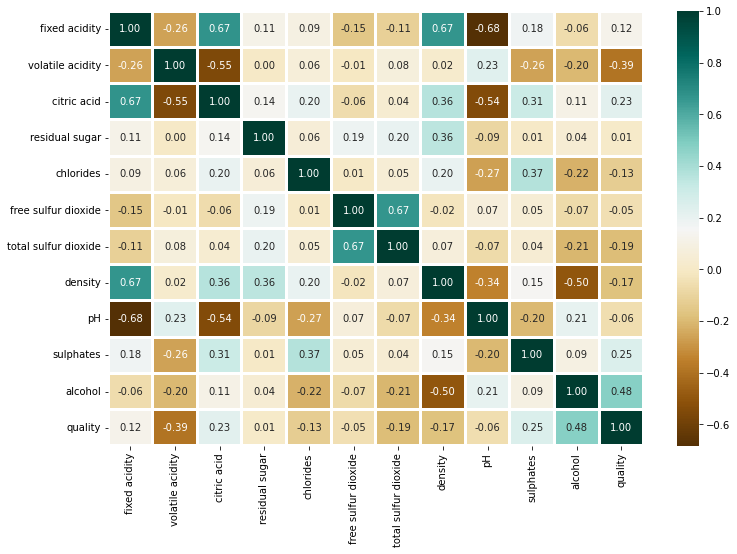

In [10]:
# Checking correlation among variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="BrBG",fmt='.2f',linewidths=2)

# **Observations**


*   Alcohol seems to be most explanatory when it comes to quality ratings
*   pH is negatively correlated with fixed acid and volatile acid (ph = -log(acid conc))
*   Citric acid and fixed acid are positively correlated.


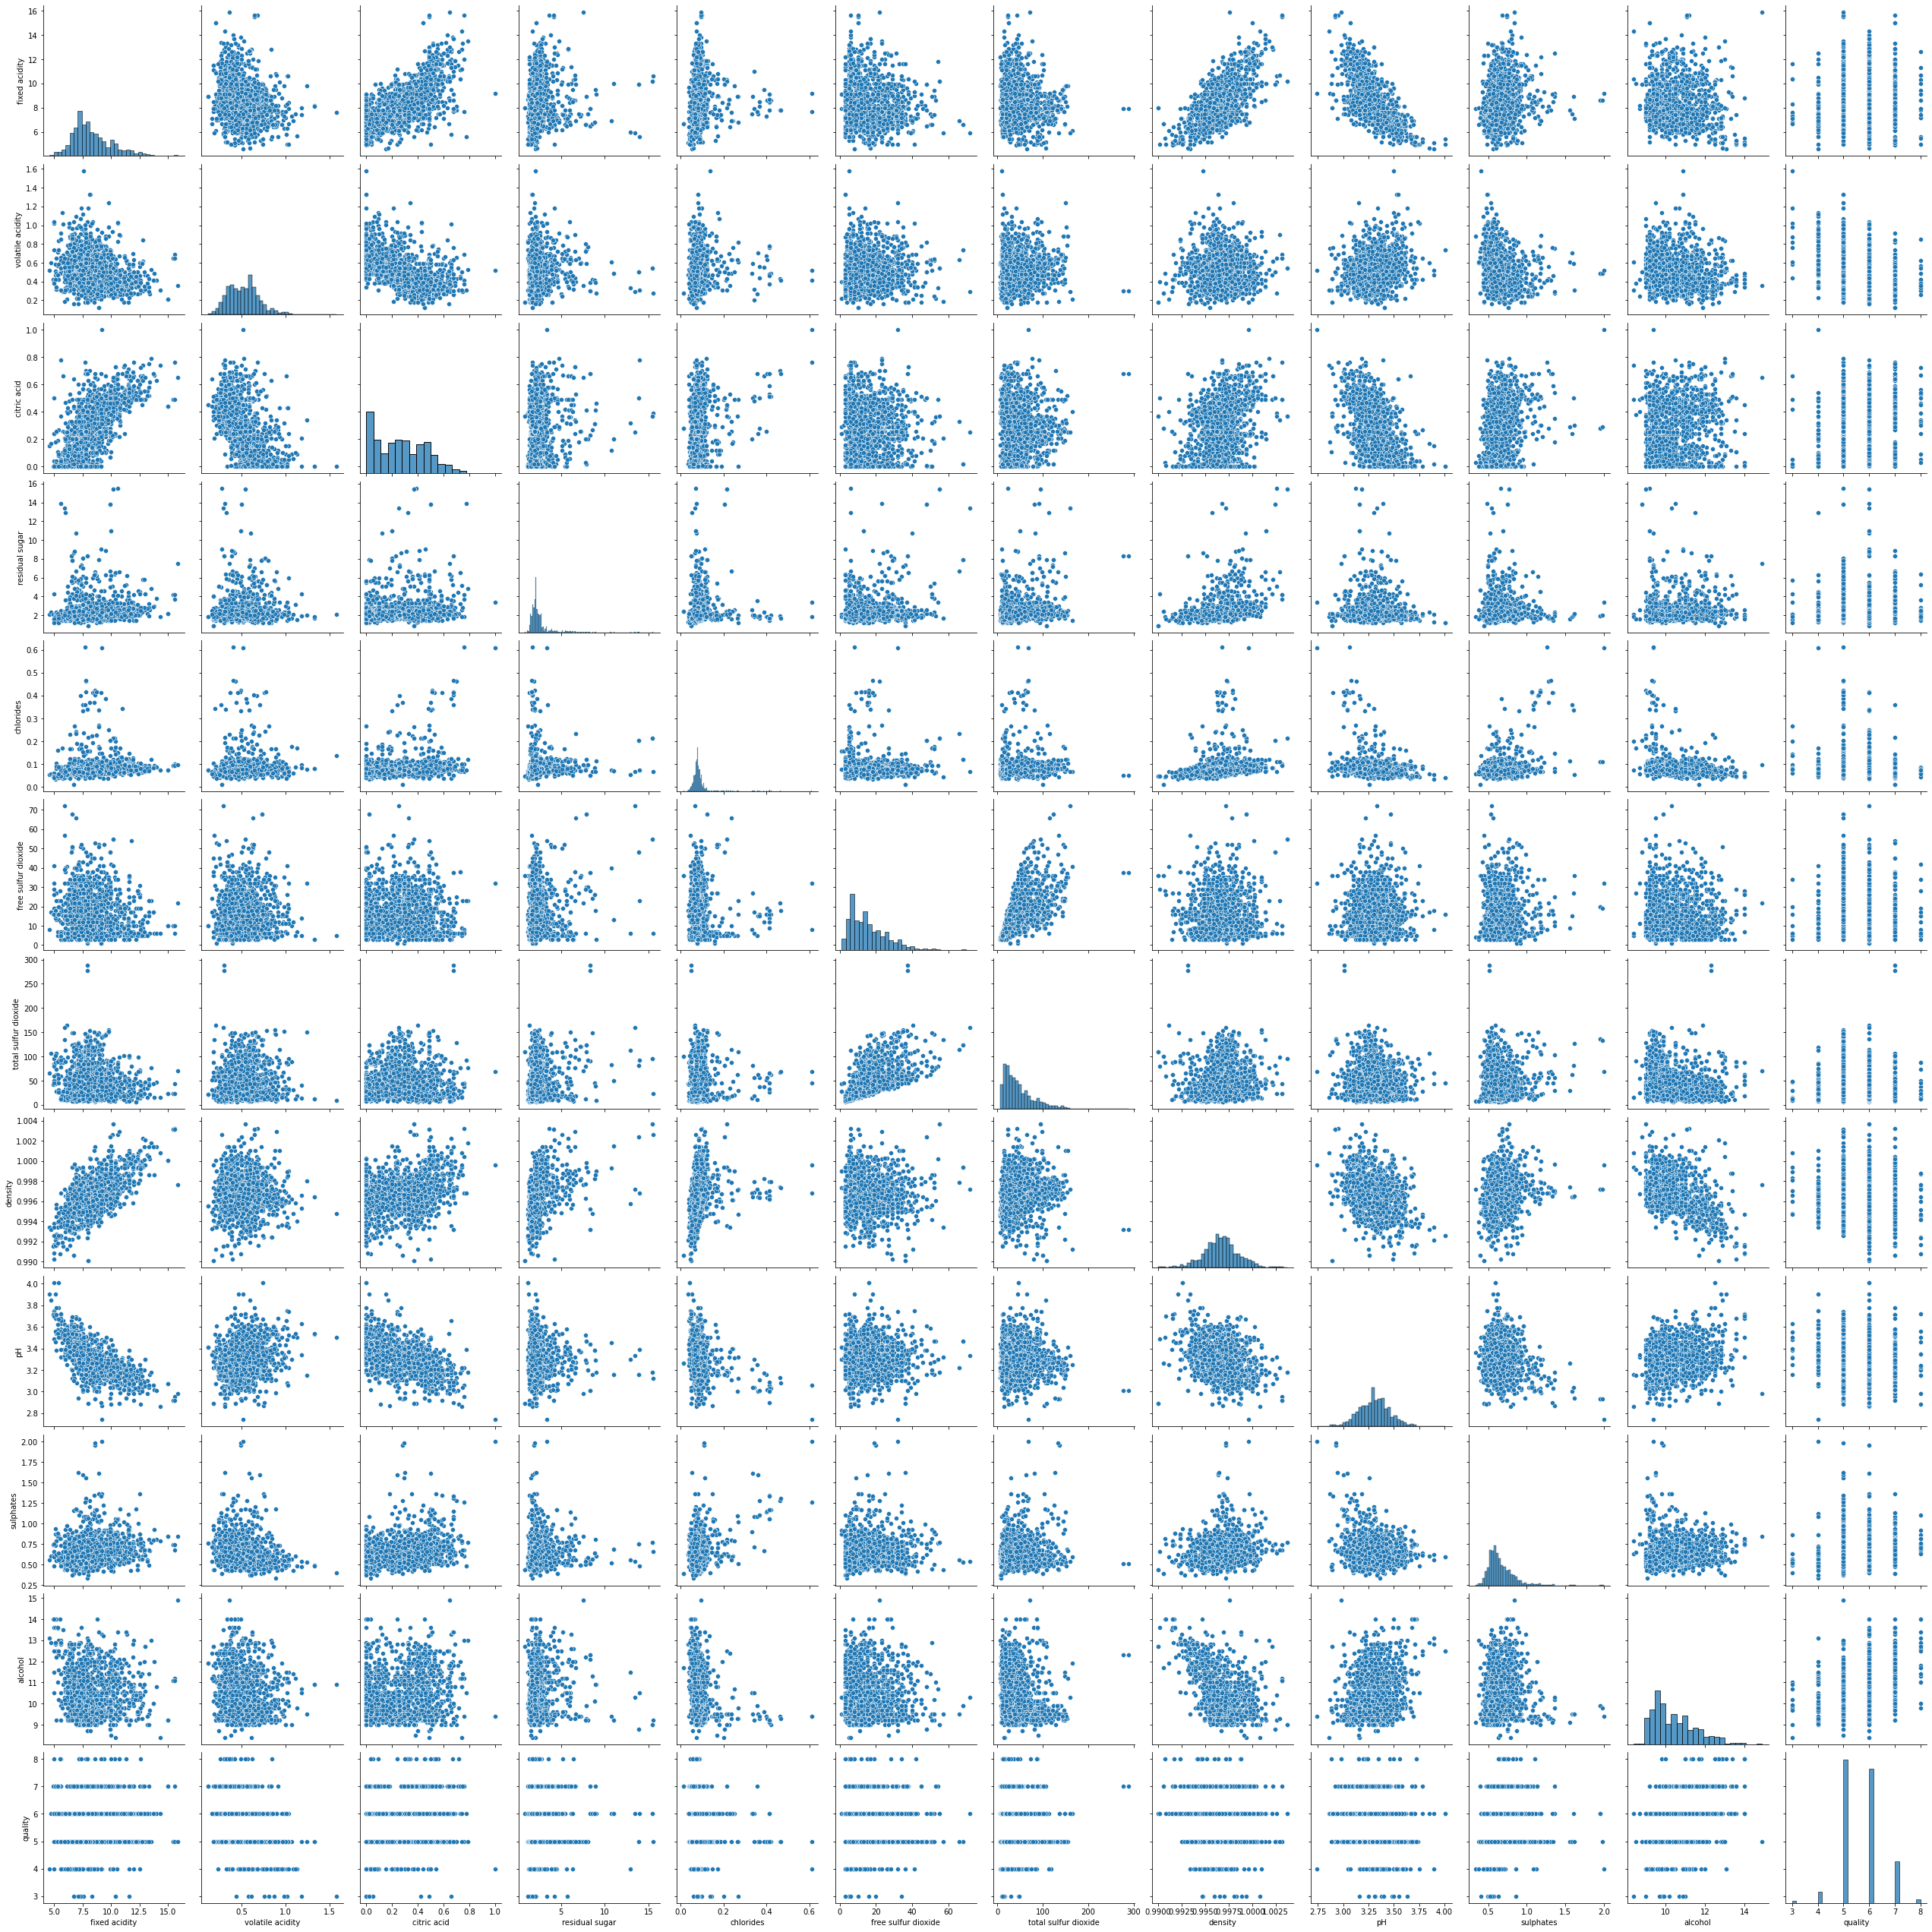

In [11]:
sns.pairplot(df,size=3)

Text(0.5, 1.0, 'citric acidity')

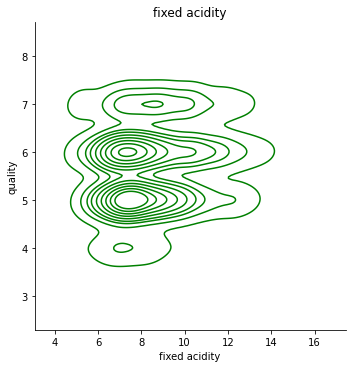

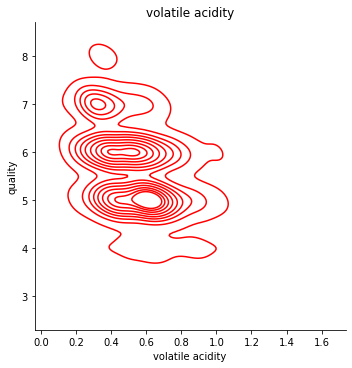

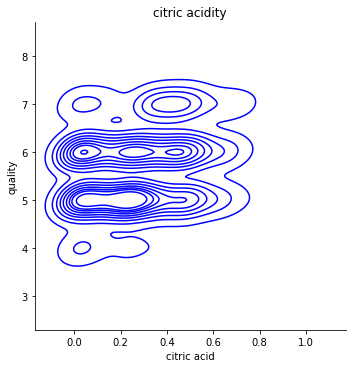

In [12]:
sns.displot(data = df,x ='fixed acidity',y='quality',kind="kde",color='green')
plt.title("fixed acidity")

sns.displot(data = df,x ='volatile acidity',y='quality',kind="kde",color='red')
plt.title("volatile acidity")

sns.displot(data = df,x ='citric acid',y='quality',kind="kde",color='blue')
plt.title("citric acidity")

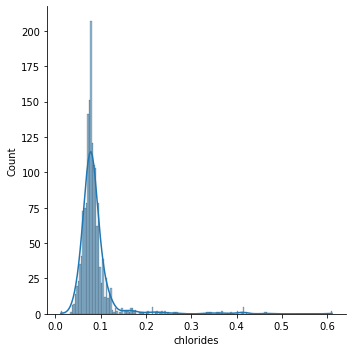

In [13]:
sns.displot(data=df,x='chlorides',kde=True)
plt.show()

# **Insights are observing Displots**



*   Mostly chlorine values are around 0.1
*   As citric acid used for freshness and flavour purpose. Hence, it's showing the correct trend.
*   All the acidic content clearly shows the consistency in the range of 4-6 in the quality trend.

# **Outliers Detection**

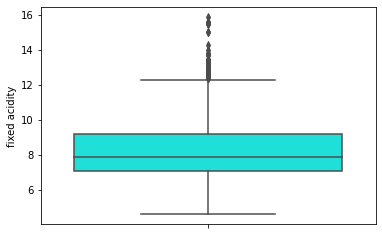

In [14]:
sns.boxplot(y=df['fixed acidity'],orient="h", palette="hsv")

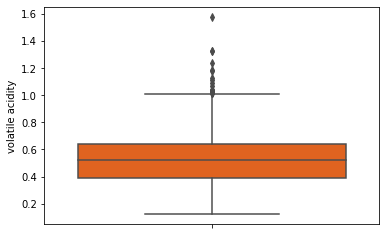

In [15]:
sns.boxplot(y=df['volatile acidity'],orient="h", palette="hot_r") 

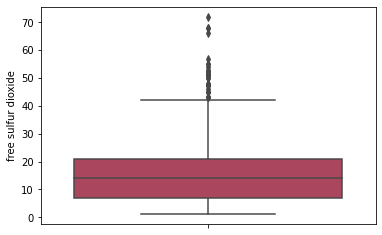

In [16]:
sns.boxplot(y=df['free sulfur dioxide'],orient="h", palette="inferno_r") 

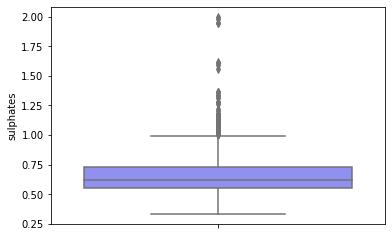

In [17]:
sns.boxplot(y=df['sulphates'],orient="t", palette="cool_r") 

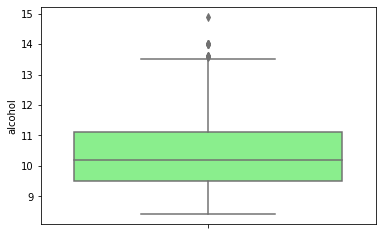

In [18]:
sns.boxplot(y=df['alcohol'],palette="jet_r")

#**Main Points after observing outliers**
*  Mean residual sugar level is 5.4 g/l, but there is a sample of very sweet wine with 65.8 g/l (an outlier).
*  Mean free sulfur dioxide is 30.5 ppm. Max value is 289 which is quite high as 75% is 41 ppm.
*  pH of wine is within range from 2.7 till 4, mean 3.2. 
*  Datasets with fixed acidity values > 12 can be neglected.

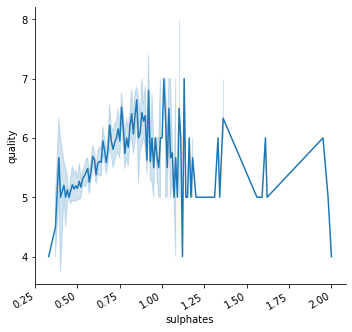

In [27]:
g = sns.relplot(x="sulphates", y="quality", kind="line", data=df)
g.figure.autofmt_xdate()

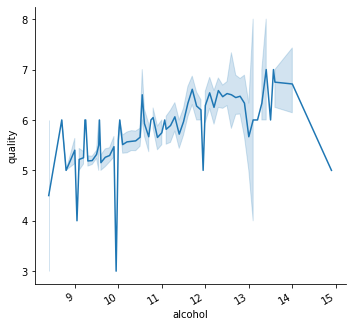

In [25]:
g = sns.relplot(x="alcohol", y="quality", kind="line", data=df)
g.figure.autofmt_xdate()

# **Alcohol is the most important feature for quality prediction**

# **Conclusions**


*  When **alcohol** percentage decreases, density grows.
*  In general greater the extent of alcohol , better the quality of the wine. For ex : Wine with high **alcohol percentage has quality level 7**, wine with less alcohol percentage is **quality level 5**.
*  When fixed acidity increases density of red wine increases as well. 
*  Total **sulfur dioxide and level of residual sugar are positively correlated**. 
*  Wine density and **residual sugar level have positive correlation.**
